# This is the numerical problem 5 with its tutorial notebook. The deadline for a solution of problem 5 is the midnight of November 29

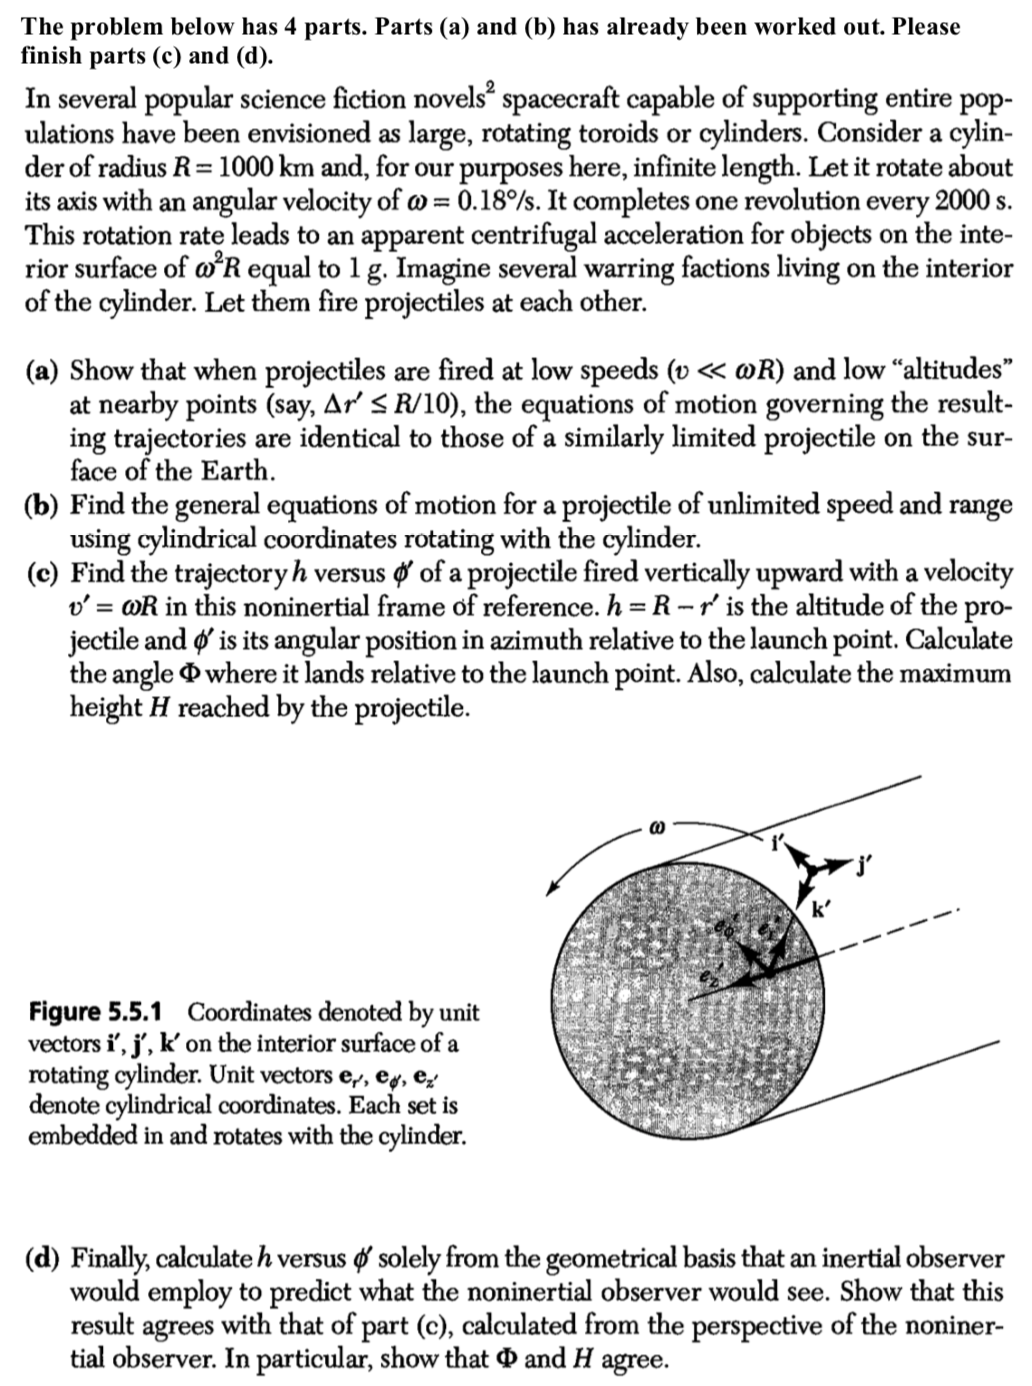

In [1]:
from IPython.display import Image
Image('./NA_images/NA4_1.png', width=800, height=600)

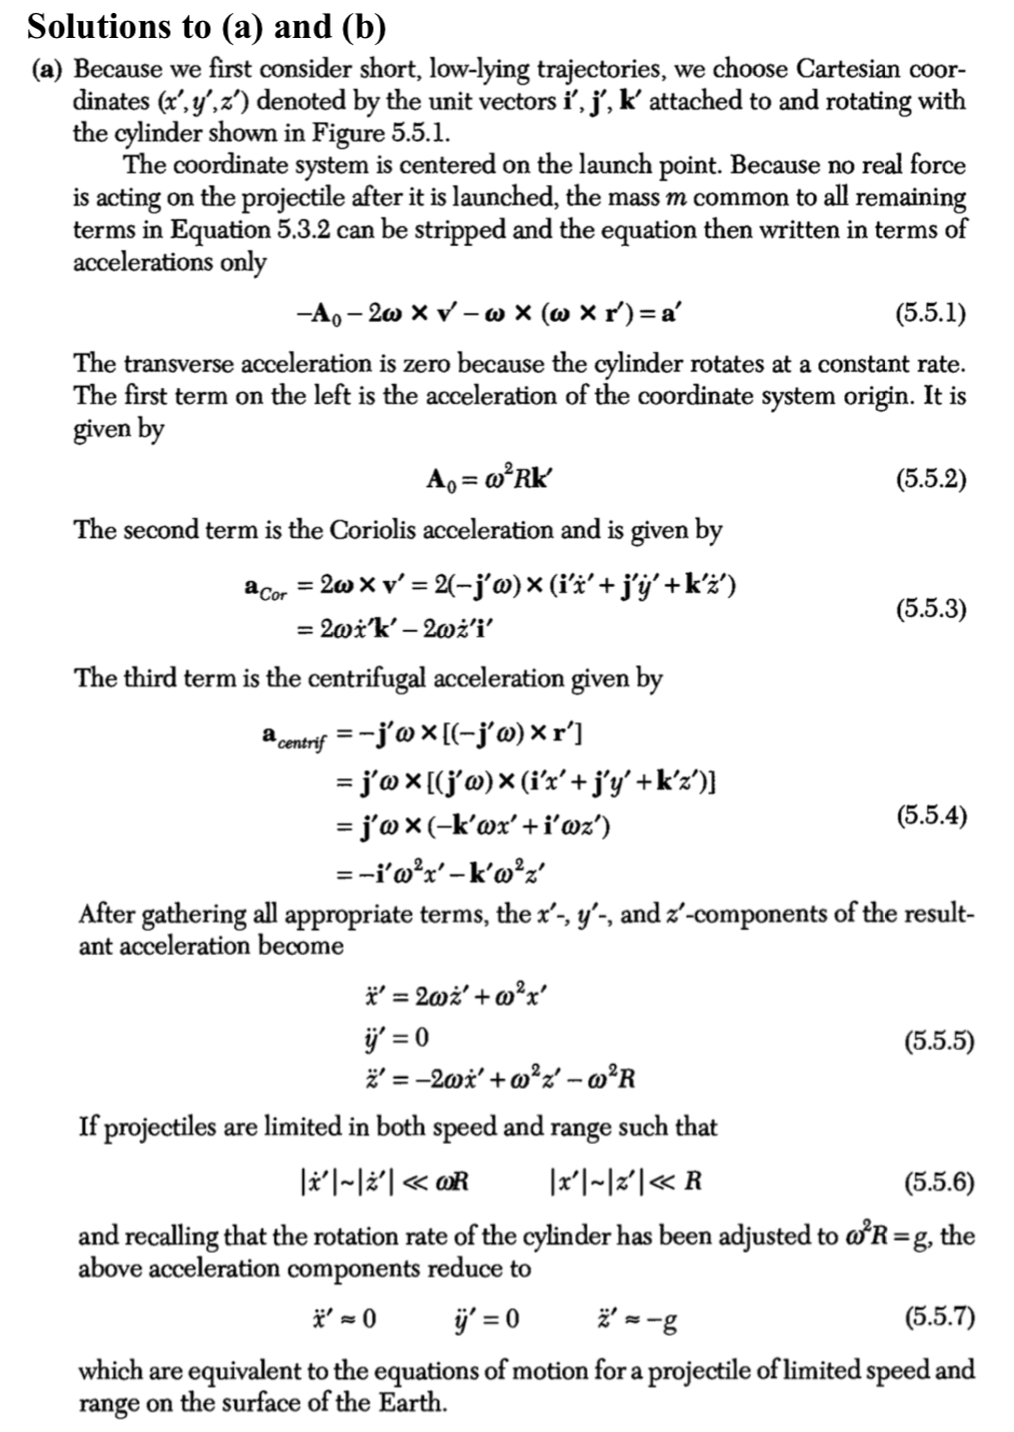

In [2]:
Image('./NA_images/NA4_2.png', width=800, height=600)

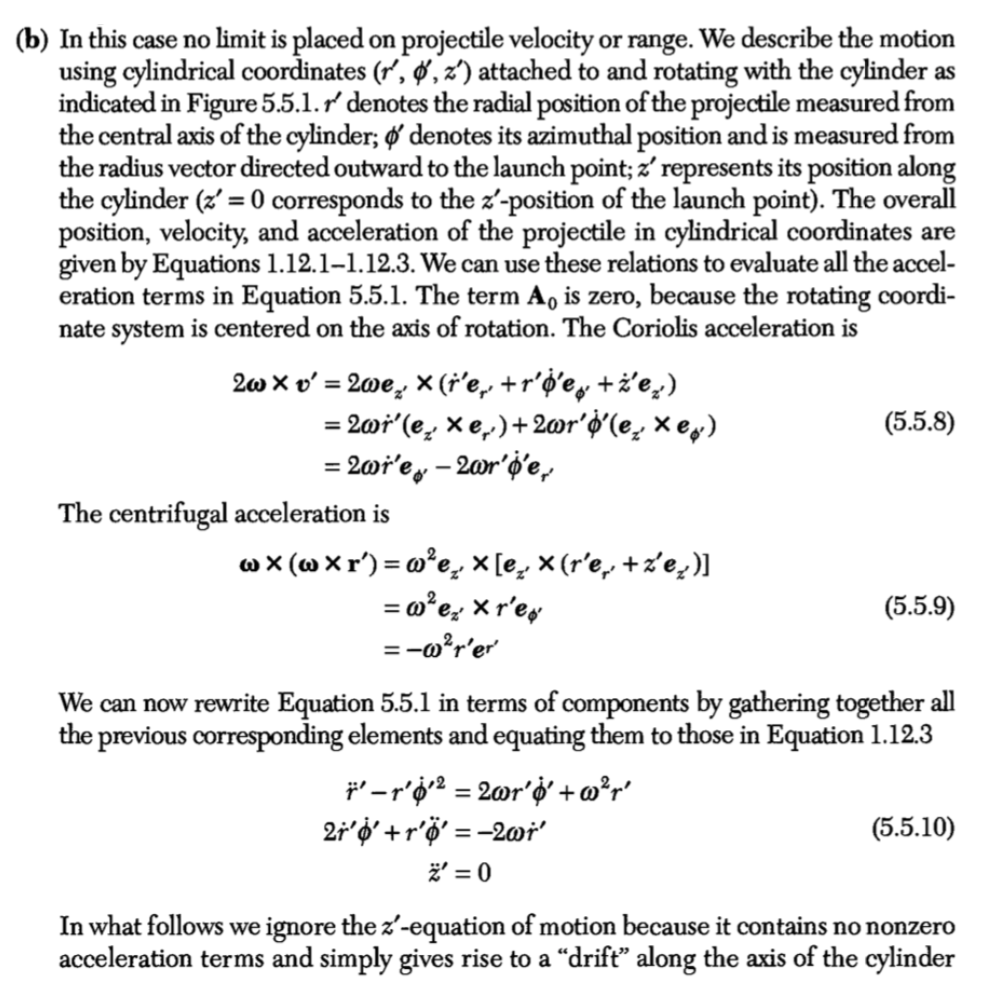

In [3]:
Image('./NA_images/NA4_3.png', width=800, height=600)

# The tutorial notebook for the numerical problem 5

# Centrifugal and Coriolis' forces on merry go round

From Example 5.5.1 in the textbook of Fowles & Cassiday, the equations of motion of a body
in a rotating frame of reference in a plane perpendicular to the rotation axis
in a cylindrical coordinate system attached to the rotating frame are

$
\ddot{r'} = 2\omega r'\dot{\phi'} + r' (\,f_\mathrm{cf}\,\omega^2+\dot{\phi'}^2),
$

$
\ddot{\phi'} = -\frac{2\dot{r'}}{r'} (\omega+\dot{\phi'}),
$

where $r'$ is the distance from the rotation axis, $\phi'$ is the azimuthal angle in the plane of motion,
and $f_\mathrm{cf}=1$ is a factor that can be used to turn off ($\,f_\mathrm{cf}=0$) the centrifugal force.

The above two second-order ODEs can be written as a system of four first-order ODEs as

$$
\dot{y_1} = y_2,\\ \ \
\dot{y_2} = 2\omega y_1 y_4 + y_1(\omega^2+y_4^2),\\ \ \
\dot{y_3} = y_4,\\ \ \
\dot{y_4} = -\frac{2y_2}{y_1} (\omega+y_4),\\
$$

where $y_1 = r'$ and $y_3 = \phi'$.

The initial conditions for body's motion are $y_1(0) = r'(0)$, $y_2(0) = v_{r'}(0)$, 
$y_3(0) = \phi'(0)$, and $y_4(0) = v_{\phi'}(0)$.

# Questions

__(a)__ With what initial velocity must the ball be thrown __(1)__ to return to the pitcher and __(2)__ to hit a person sitting at 90 degrees to the right?

The initial velocity of the ball is $\mathbf{v}(0) = v_{r'}(0)\mathrm{e}_{r'} + v_{\phi'}(0)\mathrm{e}_{\phi'}$.
For an observer in the inertial frame of reference (outside the rotating cylinder), the ball will return to the pitcher if after traveling along a straight line, because there are no forces acting on the ball in the inertial frame of reference, it meets the pitcher
on the opposite site of the merry-go-round circle. This means that ball's travel time $\frac{2R}{v_{r'}(0)}$ along the diameter must be equal to a half of the rotation period $\frac{T}{2}$, where $T=\frac{2\pi}{\omega}$,
therefore $v_{r'}(0) = \dot{r'}(0) = \frac{2}{\pi}R\omega$. At the same time, for the ball to fly straight along the diameter from the point of view of the inertial viewer, its azimuthal velocity component $R\omega$ must be compensated by 
$v_{\phi'}(0) = -R\omega$ or $\dot{\phi'}(0) = -\omega$. Similarly, for the ball to hit a person sitting at 90 degrees to the right of the pitcher, it must be thrown with $\dot{r'}(0) = \frac{4}{\pi}R\omega$ and $\dot{\phi'}(0) = -\omega$.

__(b)__ How will ball's trajectory look like if it's thrown from the center with the same radial and azimuthal velocities as in the example __(a1)__ above, but with the centrifugal force turned off? Let $\omega=1$ rad/s, and $R=2$ m.

# If you need help 
Examples and Python notebooks at https://github.com/UVic-CompPhys/physmath248-2018
will help you to find solutions of this and other problems and to present your solutions in a form of a python notebook. 
In particuar, some help for the solution of the present problem
can be found in the following notebooks: 

`Introduction.ipynb`

`Part.I 3. Introduction to Python programming.ipynb`

`Part.III 1. ODEs.ipynb`

In [2]:
# populate the interactive namespace with functions 
# from the modules numpy and matplotlib
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [3]:
# the following commands allow to produce 
# a nice pdf version of the notebook with figures:
from matplotlib.pyplot import *
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [4]:
# the function defining the right-hand sides of the ODEs
def dy_dt(y, t, omega, fcf):
    y1, y2, y3, y4 = y
    # a special care should be taken here
    # to avoid the situation when the denominator y1=0.
    eps = 1e-12
    if abs(y1) < eps:
        y1 = eps
    dydt = [y2, 2.*omega*y1*y4+y1*(fcf*omega**2+y4**2),\
            y4, -(2.*y2/y1)*(omega+y4)]
    return dydt

In [24]:
omega = 1.  # angular velocity in rad/s
R = 2.  # radius in m

# the initial conditions

fcf = 1. # the centrifugal force is included

# (a1) the ball returns to the pitcher
y0 = [R, -(2./pi)*R*omega, 0., -omega]

# (a2) the ball is caught at 90 degrees
#y0 = [R, -(4./pi)*R*omega, 0., -omega]

# (b) the ball thrown with the same velocity, but with
#fcf = 0. # the centrifugal force turned off
#y0 = [0., -(2./pi)*R*omega, 0., -omega]

In [25]:
# populate the interactive namespace with the function 
# that solves ODEs
from scipy.integrate import odeint

In [26]:
# the integration time interval
t_start = 0.
t_end = 100. # adjust t_end using the plot below
nt = 10000 # the number of integration time steps

t = linspace(t_start, t_end, nt)

In [27]:
# solve the ODEs
# the angular velocity omega is defined above
sol = odeint(dy_dt, y0, t, args=(omega,fcf))

In [28]:
# select a part of the solution with radius'
# absolute magnitudes smaller than R

radius = sol[1,0]
k = 0
while abs(radius) < R and k < nt-1:
    k += 1
    radius = sol[k,0]

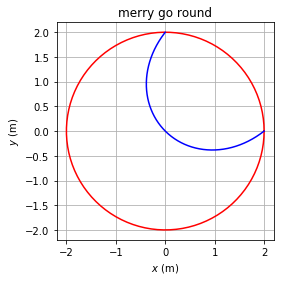

In [29]:
# plot a trajectory
figure(1)

ax = axes()

# Drawing the cylinder 
ncirc = 100
phi = linspace(0,2.*pi,ncirc)
xcirc = linspace(0,0,ncirc)
ycirc = linspace(0,0,ncirc)

for icirc in range(ncirc):
    xcirc[icirc] = R*cos(phi[icirc])
    ycirc[icirc] = R*sin(phi[icirc])
    
ax.set_aspect(1)

plot(xcirc, ycirc, 'r')

# Plotting the trajectory
plot(sol[0:k,0]*cos(sol[0:k,2]), sol[0:k,0]*sin(sol[0:k,2]), 'b')
xlabel('$x\ (\mathrm{m})$')
ylabel('$y\ (\mathrm{m})$')
grid()
title("merry go round")
show()